# Customer Churn Prediction Using Logistic Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib widget
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/ASUS/Downloads/Telco.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Looking Deeper Into Dataset

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,8265-HKSOW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Data Cleaning

In [4]:
#Inquiring the string value of every index in TotalCharge column.
df1 = df.TotalCharges.str.contains(pat=r'(\d\w)', regex=True)
df1.value_counts()
df2 = df.iloc[df1.values == False]
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
#replacing space with nan values in TotalCharges column
df.TotalCharges = df.TotalCharges.replace(" ", np.nan)

#dropping null values from data frame
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#convert initial type of TotalCharges column to float type
df.TotalCharges = df.TotalCharges.astype(float)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Looking for duplicates
df.duplicated().sum()

0

In [7]:
# Dropping columns with more than four categories and numerical columns
df1 = df.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])

# Showing all categories from categorical columns
for i in df1.columns:
    uniq = df1[i].unique()
    print("{column} = {unique}".format(column=i, unique=uniq))
    

gender = ['Female' 'Male']
SeniorCitizen = [0 1]
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [8]:
# Replacing 1 and 0 value in SeniorCitizen columns
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
# Replacing some categorical values from some categorical columns
columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

for i in columns:
    df[i] = df[i].replace({'No internet service' : 'No'})
    df[i] = df[i].replace({'No phone service' : 'No'})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
# Building new categories in tenure column
def tenure(data) :
    
    if data.tenure <= 12 :
        return "0-12"
    elif (data.tenure > 12) & (data.tenure <= 24 ):
        return "12-24"
    elif (data.tenure > 24) & (data.tenure <= 48) :
        return "24-48"
    elif (data.tenure > 48) & (data.tenure <= 60) :
        return "48-60"
    elif data.tenure > 60 :
        return "Over 60"
    
df.tenure = df.apply(lambda df:tenure(df), axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0-12,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,24-48,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,0-12,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,24-48,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,0-12,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,0-12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,12-24,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,0-12,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,24-48,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,Over 60,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), object(19)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,2,2,2,5,2,2,3,2,...,2,2,2,2,3,2,4,NaN,NaN,2
top,8265-HKSOW,Male,No,No,No,0-12,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,5890,3639,4933,2175,6352,4065,3096,5017,...,4614,4992,4329,4301,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


## Handling Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1567fd0c080>,
 'caps': [<matplotlib.lines.Line2D at 0x1567fd0c7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1567fe1aef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1567fd0ceb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1567fd18278>],
 'means': []}

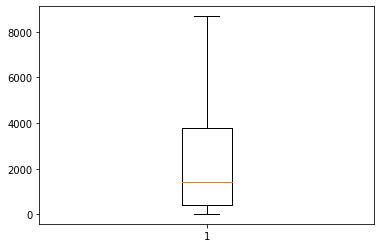

In [12]:
plt.boxplot(df['TotalCharges'])
# Do not see any outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1567fd8f6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1567fd8fe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1567fd8f588>],
 'medians': [<matplotlib.lines.Line2D at 0x1567fd9a550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1567fd9a8d0>],
 'means': []}

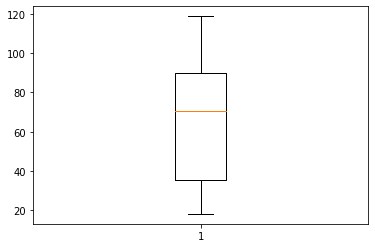

In [13]:
plt.boxplot(df.MonthlyCharges)

## Exploratory Data Analysis

In [14]:
# Separating churn customer and not churn customer
churn     = df[df.Churn == 'Yes']
not_churn = df[df.Churn == 'No']

# Separating target column, Customer ID column, categorical columns, and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

### Vizualizing Data

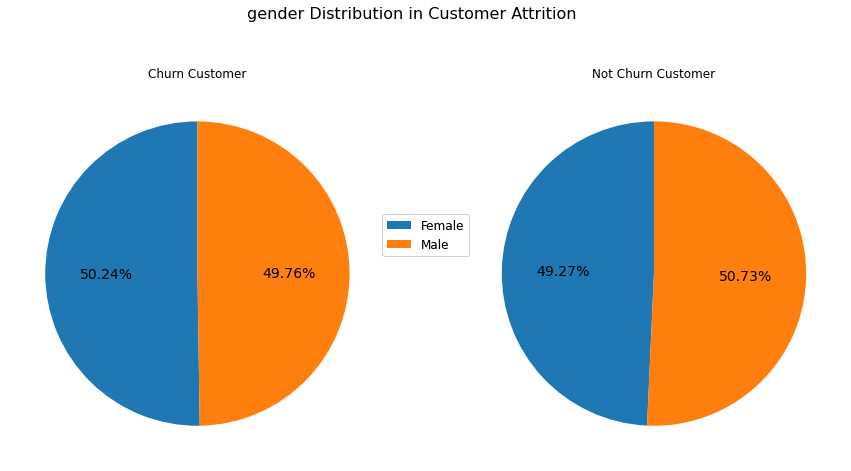

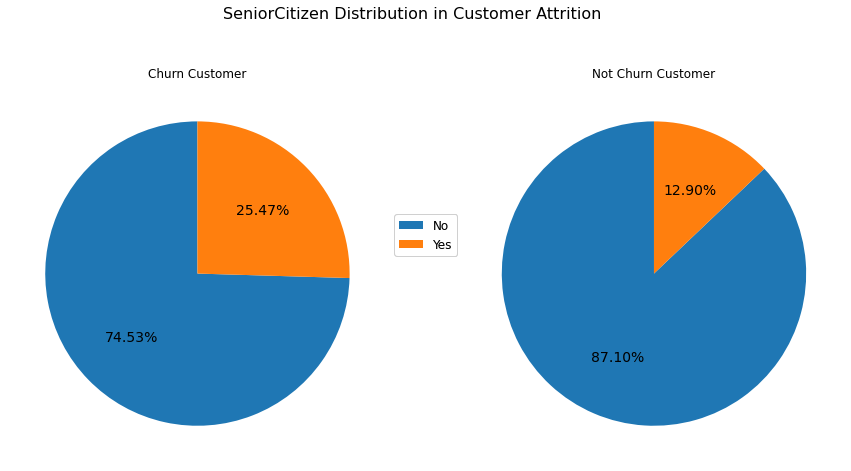

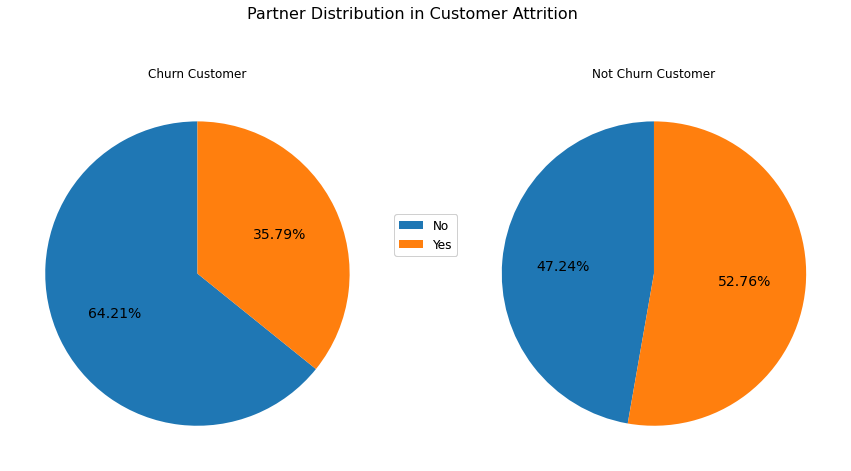

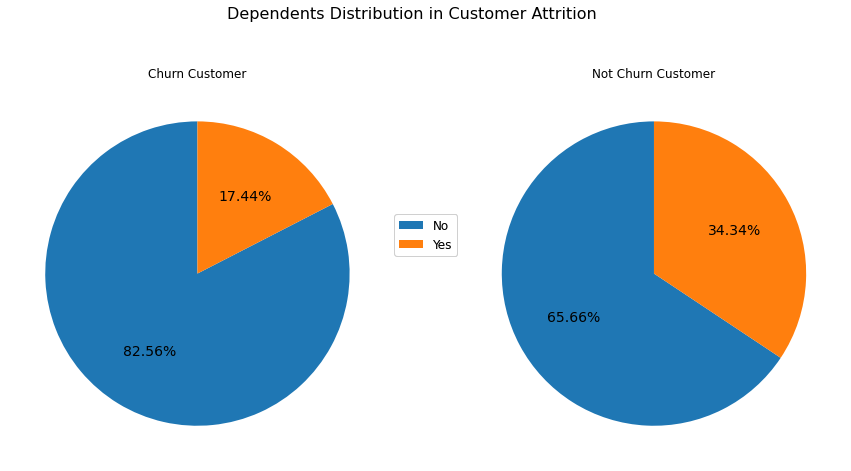

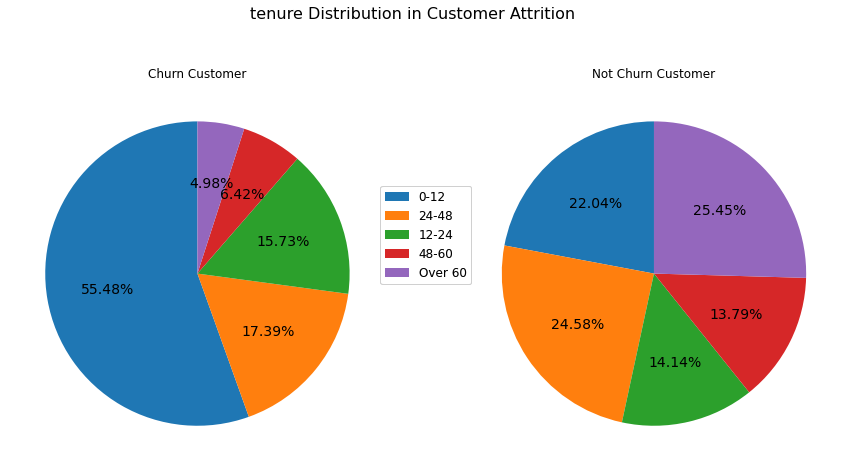

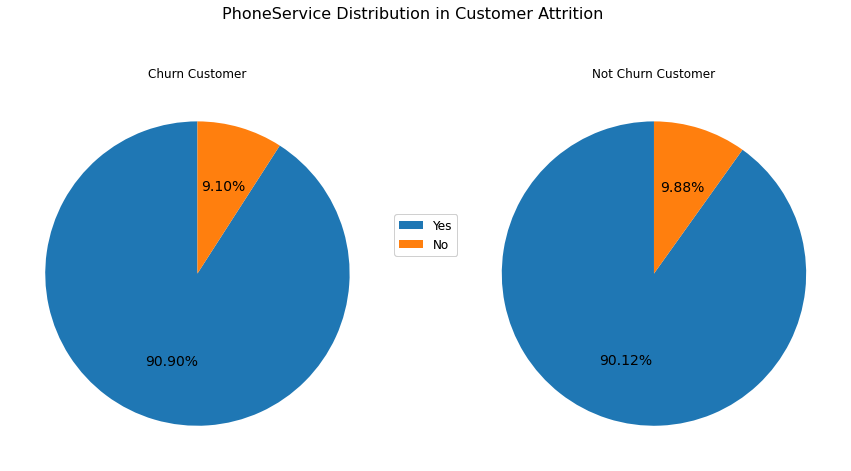

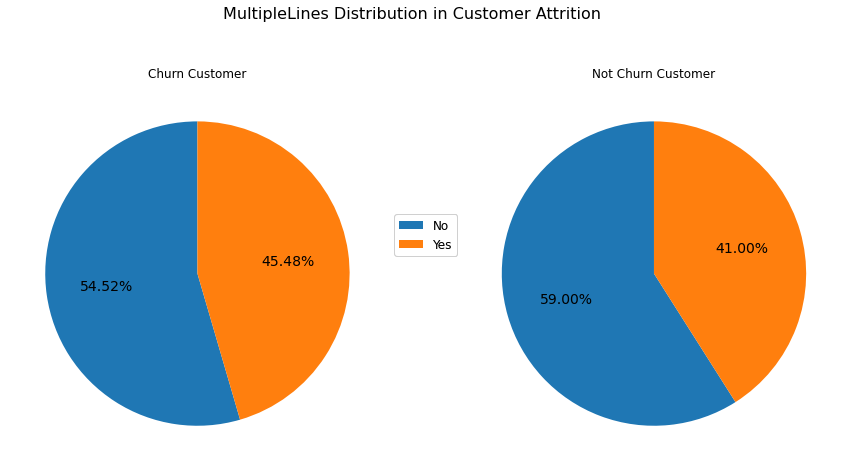

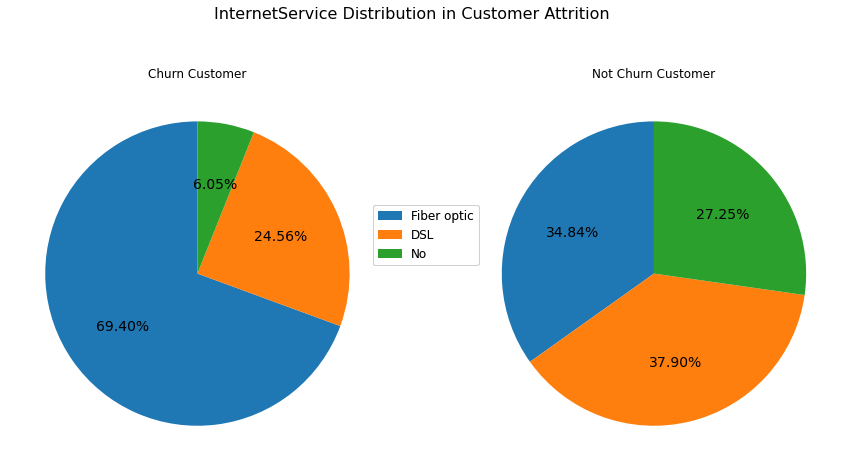

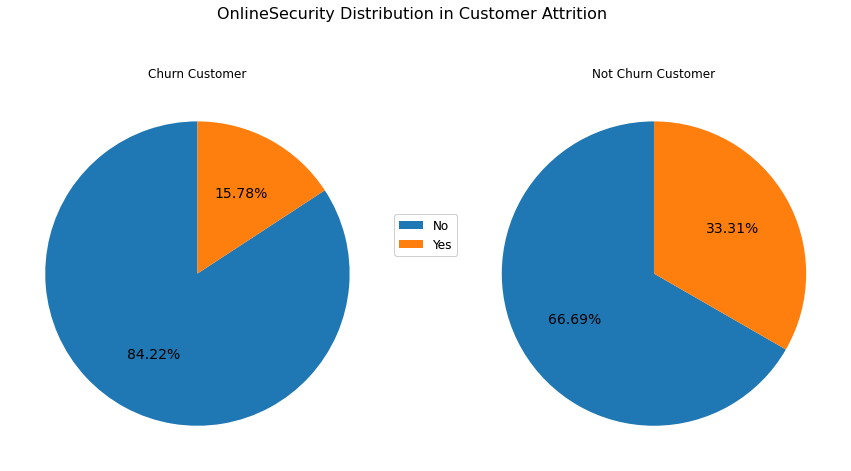

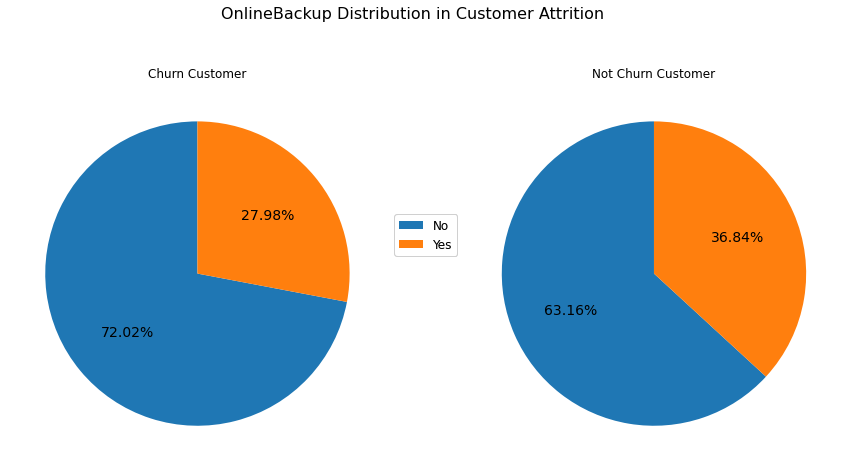

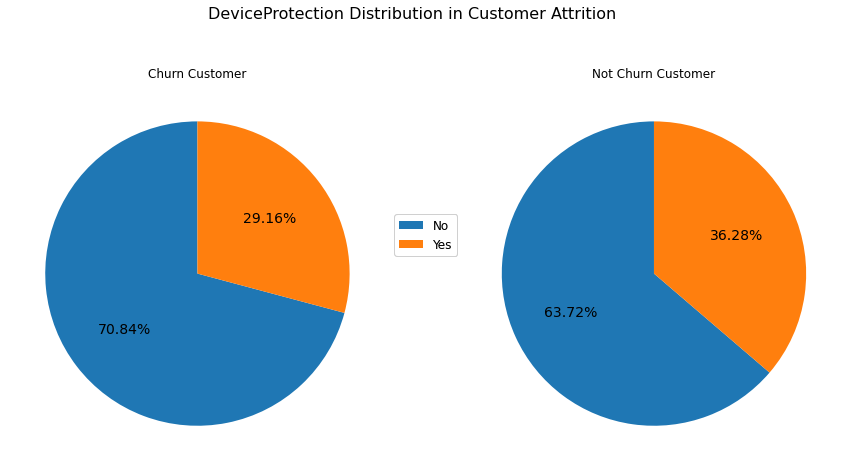

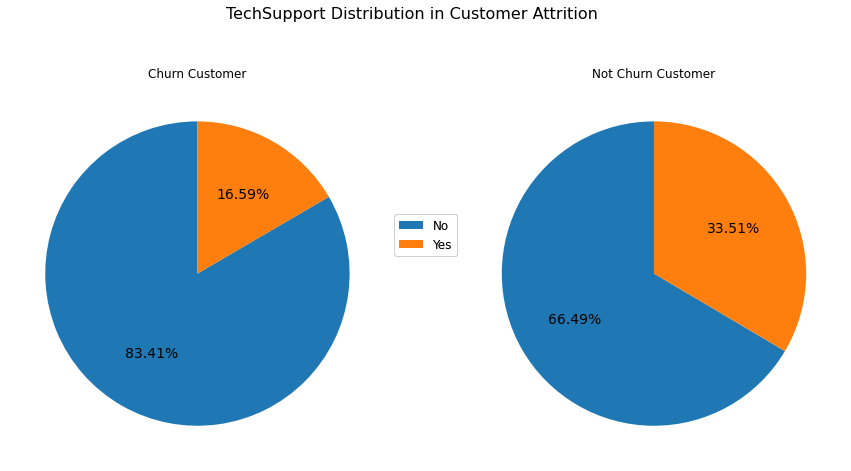

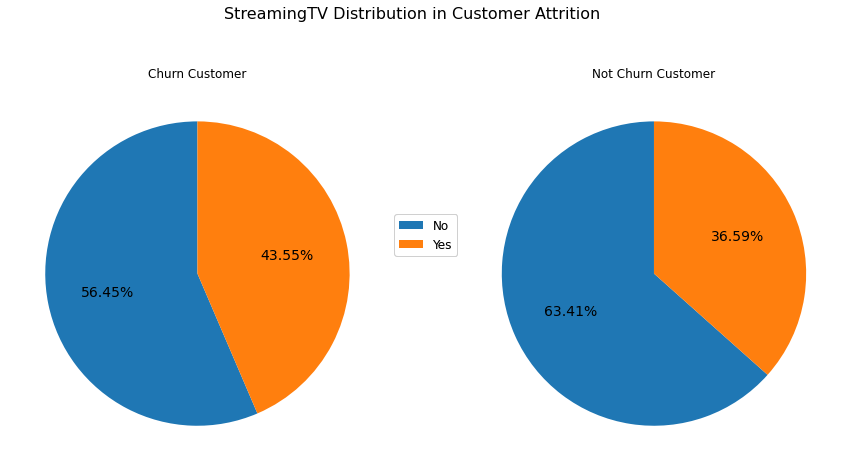

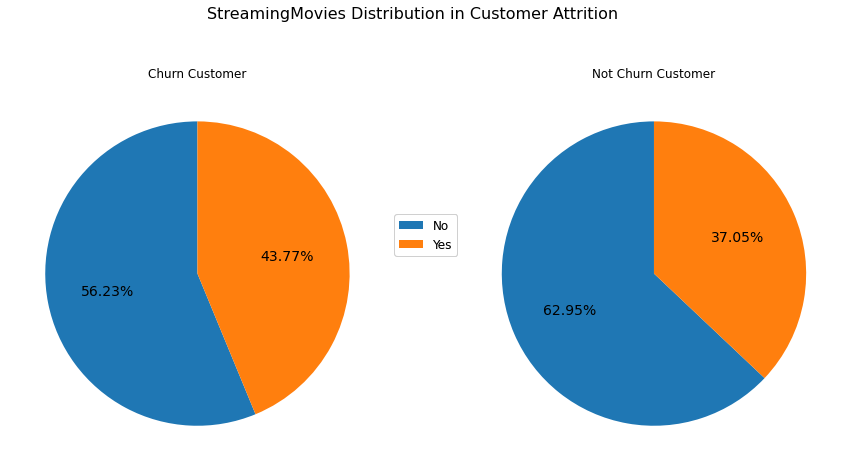

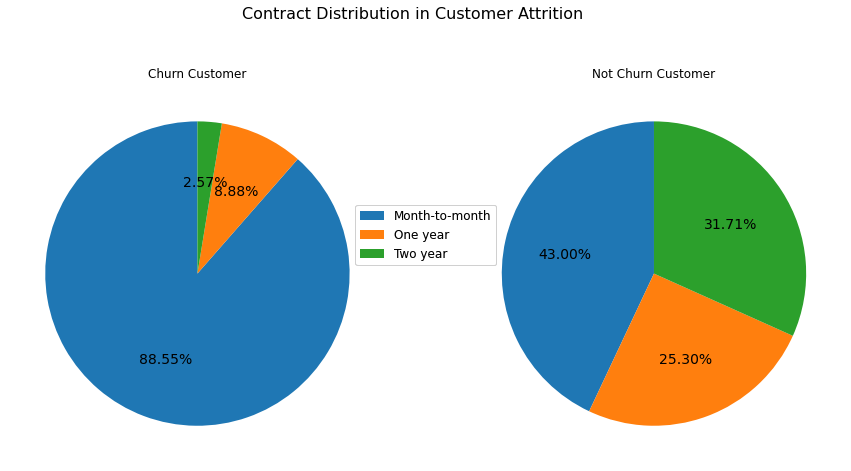

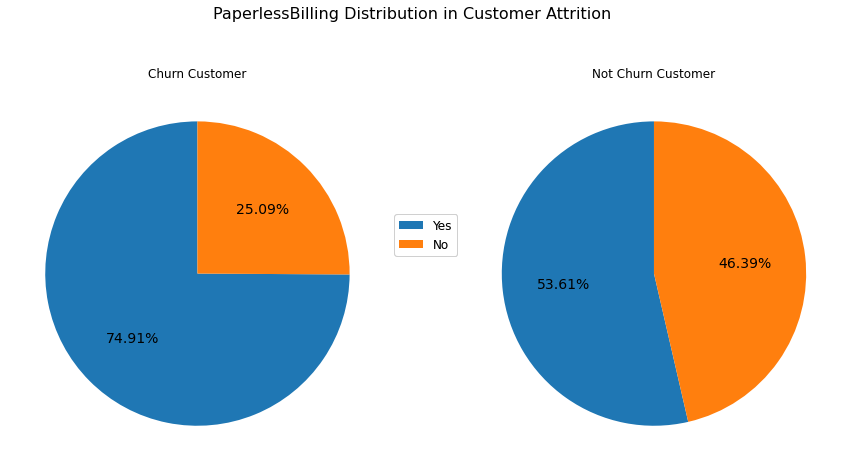

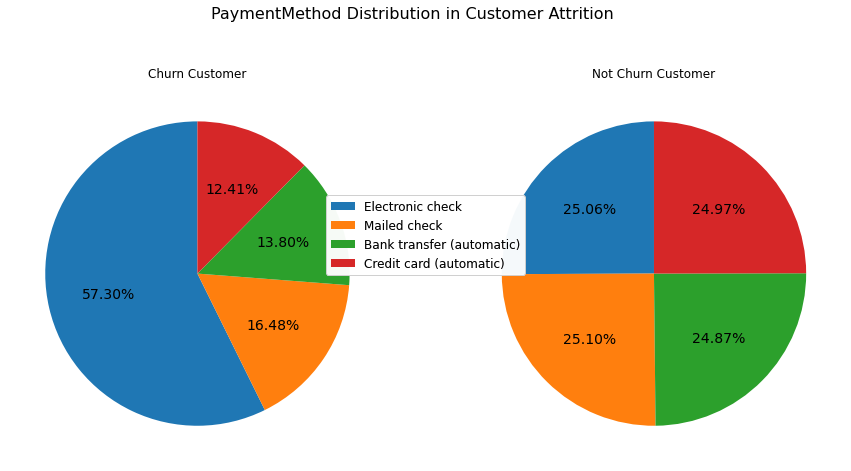

In [15]:
#Visualizing relationship between categorical columns and churn columns 
def pie_plot(columns):

    value = churn[columns].value_counts().values.tolist()
    value1 = not_churn[columns].value_counts().values.tolist()

    label = churn[columns].value_counts().keys().tolist()
    label1 = not_churn[columns].value_counts().keys().tolist()

    df1 = pd.DataFrame(value, index=label, columns=['Churn Customer'])
    df2 = pd.DataFrame(value1, index=label1, columns=['Not Churn Customer'])

    df3  = pd.concat([df1, df2], axis=1, sort=False)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
     
    for ax, col in zip(axes, df3.columns):
        artists = ax.pie(df3[col], autopct='%.2f%%', startangle=90, textprops={'fontsize': 14})
        ax.set(ylabel='', title=col, aspect='equal')

        fig.legend(artists[0], df3.index, loc='center', prop={'size': 12})
        fig.suptitle(columns + ' Distribution in Customer Attrition', fontsize=16, y=0.75)

    plt.show()

for a in cat_cols:
    pie_plot(a)

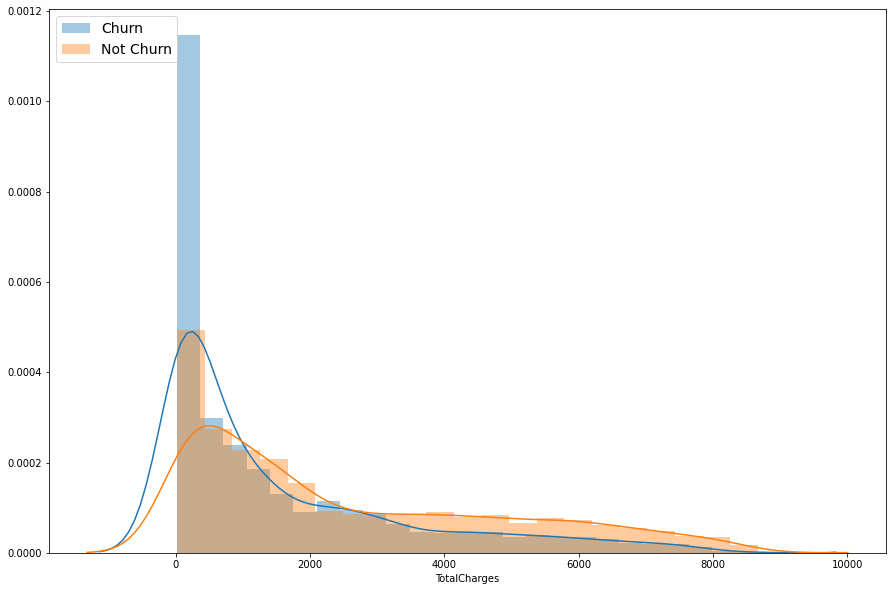

In [16]:
# Visualizing Total Charges Distribution Function
plt.figure(figsize=(15,10))
sns.distplot(churn.TotalCharges, label='Churn')
sns.distplot(not_churn.TotalCharges, label='Not Churn')
plt.legend(loc='upper left', prop={'size': 14})

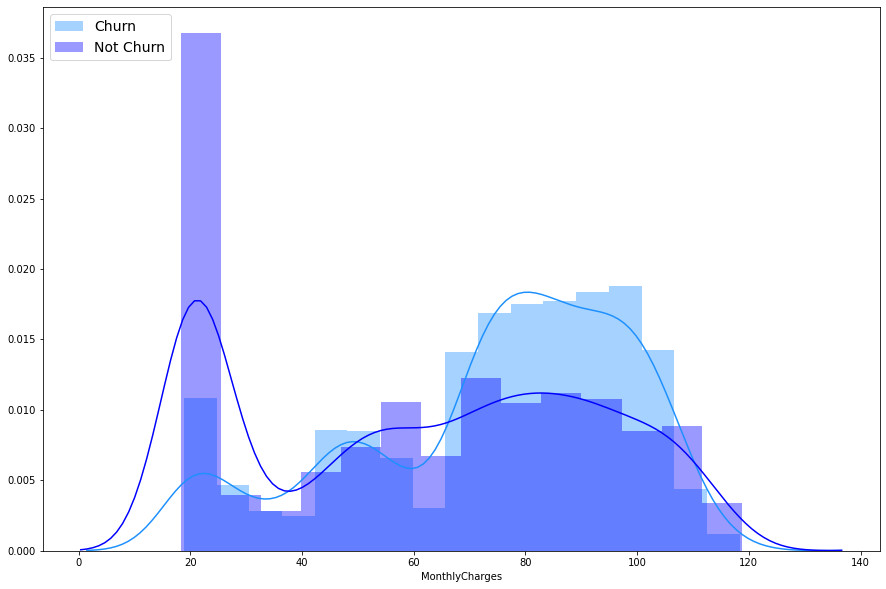

In [17]:
# Visualizing Monthly Charges Distribution Function
plt.figure(figsize=(15,10))
sns.distplot(churn.MonthlyCharges, label='Churn', color="dodgerblue")
sns.distplot(not_churn.MonthlyCharges, label='Not Churn',color="blue")
plt.legend(loc='upper left', prop={'size': 14})

## Data Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Dropping Customer ID
df = df.drop('customerID', axis=1)

#Label encoding Categorical columns
encoder = LabelEncoder()
for i in cat_cols + target_col:
    df[i] = encoder.fit_transform(df[i])
    
#Duplicating columns for multi value columns
#df = pd.get_dummies(data = df, columns = multi_cols )

#Scaling Numerical columns
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns= num_cols)

#dropping original values merging scaled values for numerical columns
df_og = df.copy()

df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index= True, right_index= True, how = "left")

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,-1.161694,-0.994194
1,1,0,0,0,2,1,0,0,1,0,1,0,0,0,1,0,3,0,-0.260878,-0.173740
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1,-0.363923,-0.959649
3,1,0,0,0,2,0,0,0,1,0,1,1,0,0,1,0,0,0,-0.747850,-0.195248
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.196178,-0.940457
5,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,2,1,1.158489,-0.645369
6,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0.807802,-0.147313
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,-1.165018,-0.874169
8,0,0,1,0,2,1,1,1,0,0,1,1,1,1,0,1,2,1,1.329677,0.336516
9,1,0,0,1,4,1,0,0,1,1,0,0,0,0,1,0,0,0,-0.287470,0.531476


## Visualizing Correlation Matrix

[Text(0.5, 0, 'gender'),
 Text(1.5, 0, 'SeniorCitizen'),
 Text(2.5, 0, 'Partner'),
 Text(3.5, 0, 'Dependents'),
 Text(4.5, 0, 'tenure'),
 Text(5.5, 0, 'PhoneService'),
 Text(6.5, 0, 'MultipleLines'),
 Text(7.5, 0, 'InternetService'),
 Text(8.5, 0, 'OnlineSecurity'),
 Text(9.5, 0, 'OnlineBackup'),
 Text(10.5, 0, 'DeviceProtection'),
 Text(11.5, 0, 'TechSupport'),
 Text(12.5, 0, 'StreamingTV'),
 Text(13.5, 0, 'StreamingMovies'),
 Text(14.5, 0, 'Contract'),
 Text(15.5, 0, 'PaperlessBilling'),
 Text(16.5, 0, 'PaymentMethod'),
 Text(17.5, 0, 'Churn'),
 Text(18.5, 0, 'MonthlyCharges'),
 Text(19.5, 0, 'TotalCharges')]

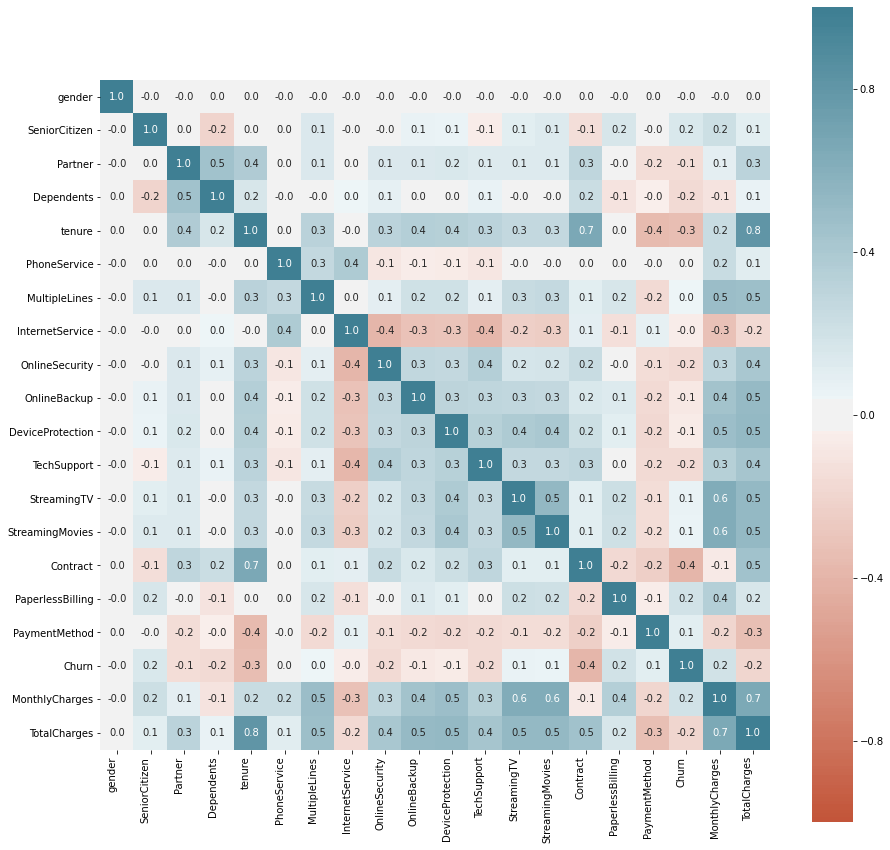

In [19]:
plt.figure(figsize=(15,15))

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.1f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

In [ ]:
# Uncomment below code to apply feature selection

# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression

# df_features = df[['Churn']]
# df_target = df.drop(['Churn', 'customerID'], axis=1)

# embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
# embeded_lr_selector.fit(df_target, df_features)

# embeded_lr_support = embeded_lr_selector.get_support()
# embeded_lr_feature = df_target.loc[:,embeded_lr_support].columns.tolist()
# print(str(len(embeded_lr_feature)), 'selected features')
# print(embeded_lr_feature)

## Splitting Dataset 

In [20]:
from sklearn.model_selection import train_test_split

features = np.array(df.drop(['Churn'], axis=1))
target = np.array(df['Churn'])

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5625, 19)
(1407, 19)
(5625,)
(1407,)


## Building Model

Predicted Target:  [0 0 0 ... 1 0 1]
Actual Target:  [0 0 0 ... 1 0 1]
Logistic Regression Score:  0.8073916133617626
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       996
           1       0.74      0.53      0.61       411

    accuracy                           0.81      1407
   macro avg       0.78      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

CV Result:  [0.78267045 0.79829545 0.80227596 0.78093883 0.81792319 0.79658606
 0.80369844 0.81792319 0.77951636 0.79516358]


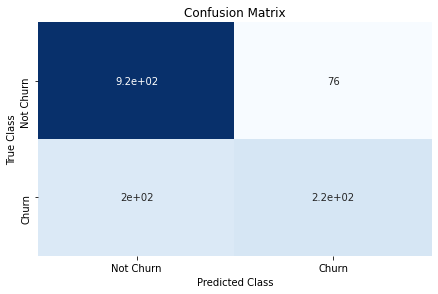

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Building model
reg = LogisticRegression()
reg.fit(x_train, y_train)

# Predict test set
prediction = reg.predict(x_test)
print('Predicted Target: ', prediction)
print('Actual Target: ', y_test)

# Scoring
score = reg.score(x_test, y_test)
print('Logistic Regression Score: ', score)

#print classification report
print(classification_report(y_test, prediction))

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(reg, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

#print cv result
print('CV Result: ', cv_results)

#Make class names
class_names = pd.Series(df['Churn'].value_counts().keys().tolist())
class_names = class_names.replace({1: 'Churn', 0: 'Not Churn'})

# Create confusion matrix
matrix = confusion_matrix(y_test, prediction)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


## Model Optimization Using GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search
gridsearch = GridSearchCV(reg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = gridsearch.fit(x_train, y_train)

# Predict test set with the optimized model
prediction = best_model.predict(x_test)
print('Predicted Target: ', prediction)
print('Actual Target: ', y_test)

# Scoring
score1 = reg.score(x_test, y_test)
print('Logistic Regression Score: ', score1)

#Classification Report
print(classification_report(y_test, prediction))

# Showing best parameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Predicted Target:  [0 0 0 ... 1 0 1]
Actual Target:  [0 0 0 ... 1 0 1]
Logistic Regression Score:  0.8073916133617626
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       996
           1       0.74      0.53      0.62       411

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407

Best Penalty: l1
Best C: 2.7825594022071245
